In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pandas as pd

In [2]:
real_value = Table.read_table("Cleaned Table 1.csv")
real_value

Industry,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Mining,53,41,51,45,26,10,4,5,2,2,2,2
Utilities,1,1,1,2,2,2,2,1,1,2,2,1
Construction,265,239,346,406,403,585,360,"1,049",850,513,632,646
Manufacturing,"24,193","26,789","27,121","29,264","32,387","32,514","33,589","37,565","35,618","38,519","38,760","38,773"
Wholesale trade,"14,496","17,163","18,946","21,350","21,696","21,736","21,647","19,279","20,007","14,253","14,875","14,101"
Retail trade,219,245,259,331,478,379,442,667,406,570,602,631
Transportation and warehousing,909,821,727,703,743,729,859,691,641,627,915,925
Information,"31,515","35,454","34,745","37,502","34,604","33,759","29,919","29,066","26,709","24,360","22,771","21,859"
"Finance, insurance, real estate, rental, and leasing",242,145,131,209,255,220,154,133,97,112,183,178
Professional and business services,"6,481","6,852","6,826","7,346","7,232","7,153","6,539","6,767","6,139","6,776","8,659","8,706"


In [3]:
gross_output = Table.read_table("Copy of table04_cleaned.csv")
gross_output = gross_output.take(np.arange(0,15))
gross_output.show()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Mining,72,54,68,58,34,13,5,7,3,3,3,2
Utilities,2,1,1,3,3,3,2,2,2,2,2,2
Construction,383,350,515,618,653,913,545,"1,649","1,433",832,"1,014","1,077"
Manufacturing,"44,500","45,870","46,345","48,639","50,423","50,217","52,215","57,984","55,157","55,601","59,475","61,224"
Wholesale trade,"29,109","32,868","35,800","39,743","41,461","44,876","46,038","40,826","40,181","37,101","38,839","36,402"
Retail trade,306,341,349,431,602,473,554,815,528,745,777,815
Transportation and warehousing,"1,690","1,503","1,340","1,309","1,341","1,317","1,580","1,268","1,210","1,150","1,779","1,743"
Information,"60,813","63,569","65,895","67,671","64,263","62,747","57,238","55,479","52,180","47,624","45,241","43,112"
"Finance, insurance, real estate, rental, and leasing",457,276,218,322,379,312,242,200,141,153,306,302
Professional and business services,"11,437","11,874","11,779","12,219","12,179","12,568","11,487","11,977","10,533","11,807","14,925","14,773"


In [4]:
def plot(row):
    array = real_value.row(row)
    anotherarray = gross_output.row(row)
    b = Table().with_column('industry',array).take(np.arange(1,13)).with_column('Years',np.arange(2012,2024))
    new_array = make_array()
    for i in np.arange(0,12):
        new = b.column('industry').item(i).split(",")
        newnew = int("".join(new))
        new_array = np.append(new_array,newnew)
    b = b.with_column('real_value',new_array).drop(0)

    c = Table().with_column('industry',anotherarray).take(np.arange(1,13)).with_column('Years',np.arange(2012,2024))
    anothernew_array = make_array()
    for i in np.arange(0,12):
        anothernew = c.column('industry').item(i).split(",")
        anothernewnew = "".join(anothernew)
        anothernewnew = int(anothernewnew)
        anothernew_array = np.append(anothernew_array,anothernewnew)
    c = c.with_column('gross_output',anothernew_array).drop(0)
    complete = c.join('Years',b,'Years')
    complete = complete.with_column('intermediate cost',complete.column('gross_output')-complete.column('real_value'))
    return complete.plot('Years')
    

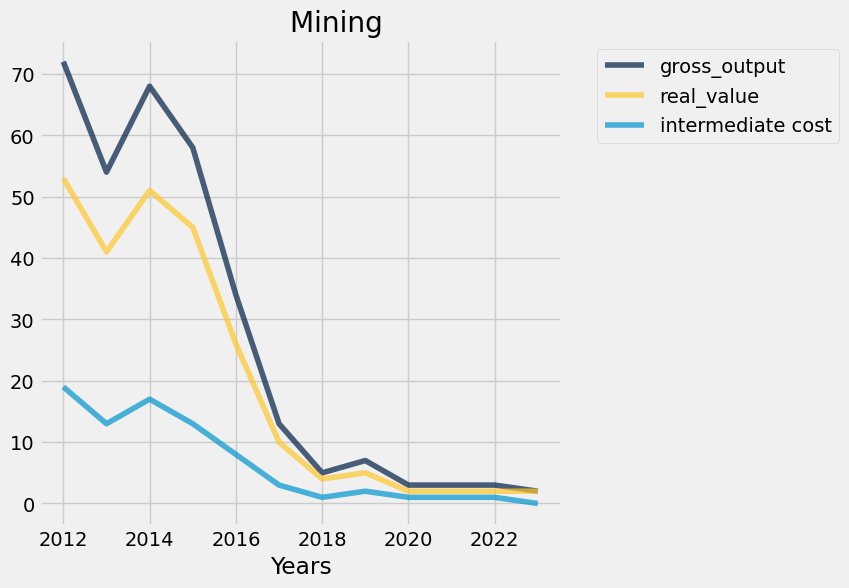

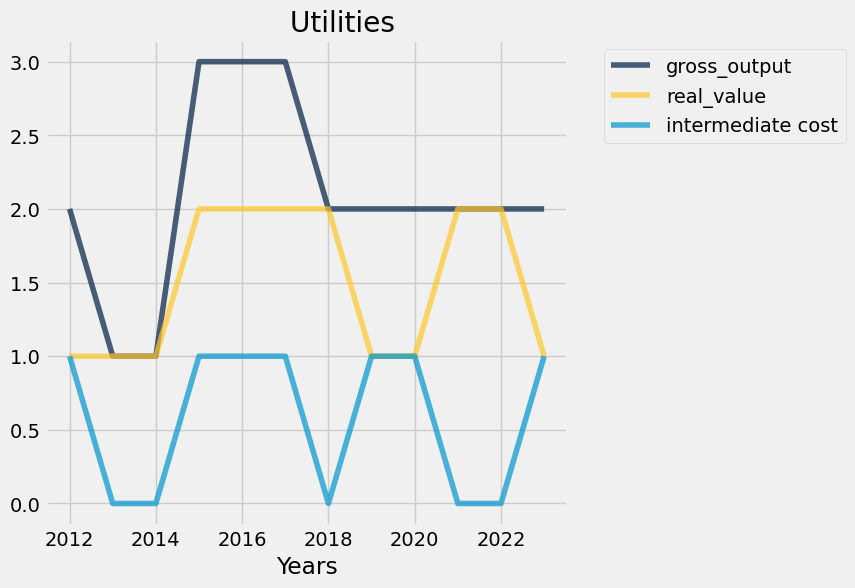

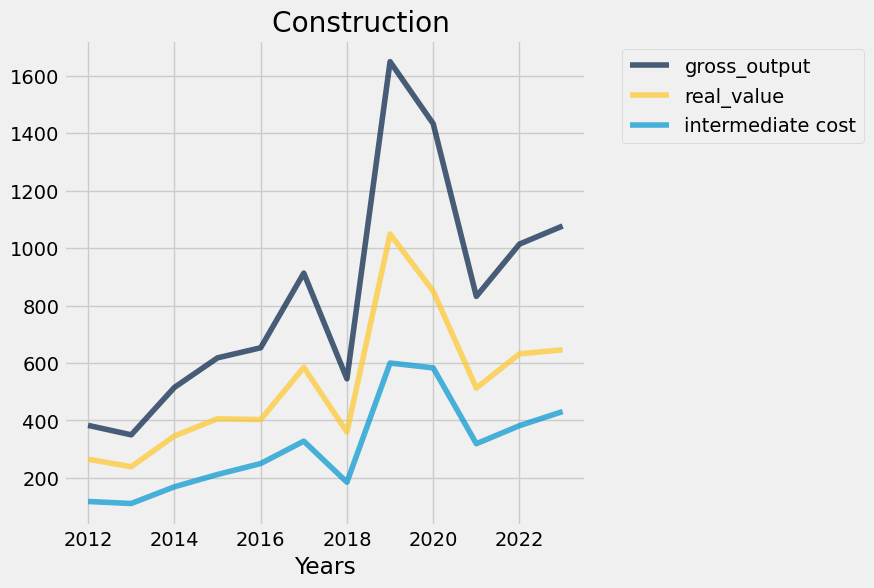

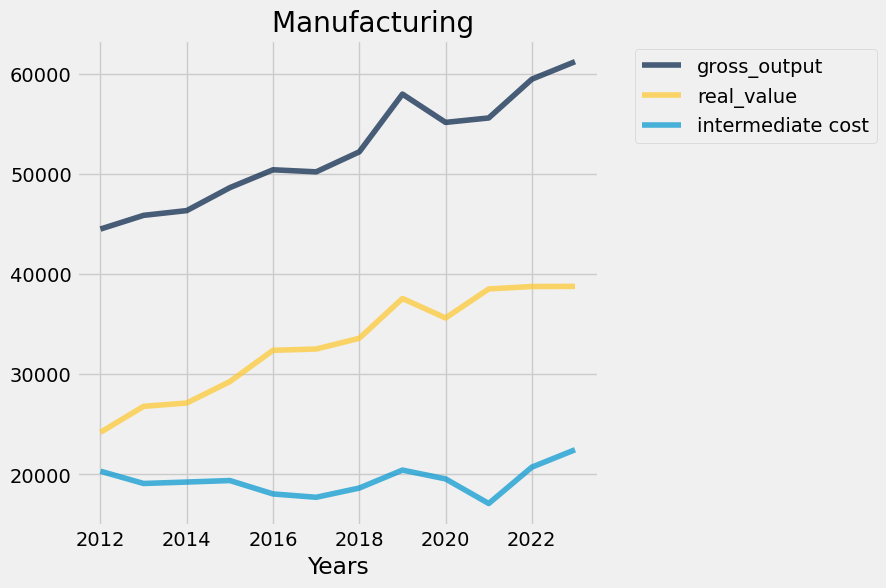

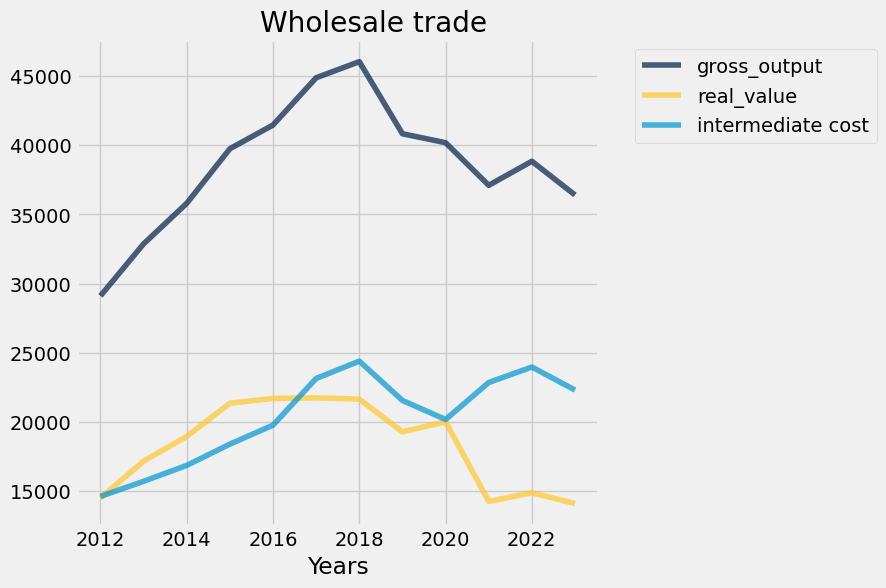

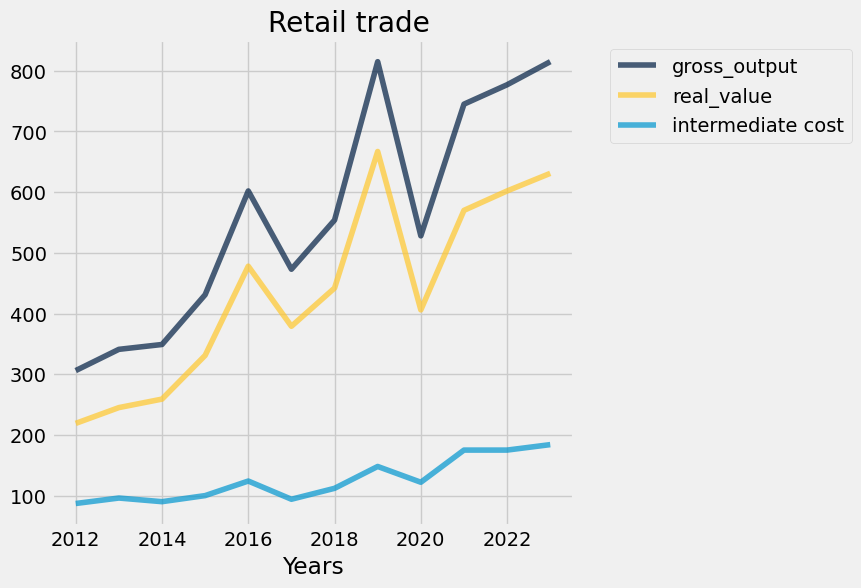

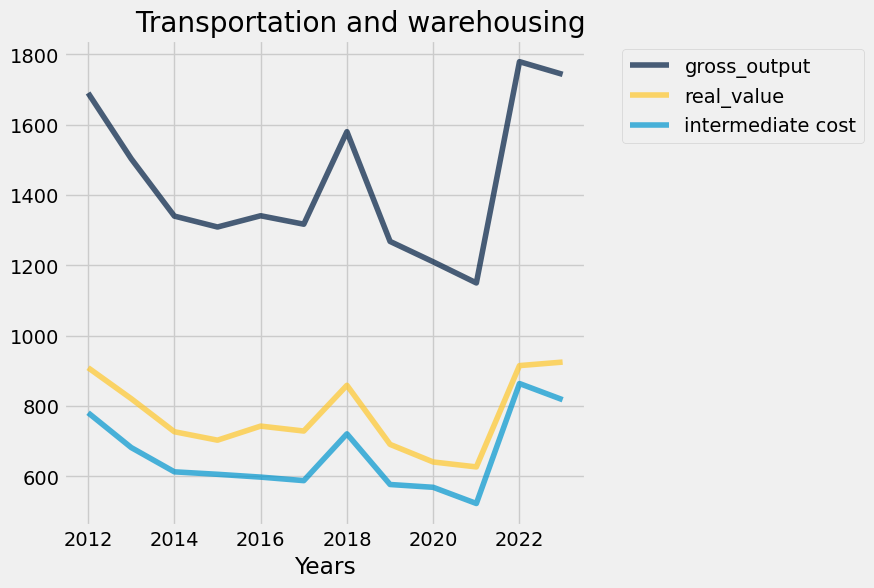

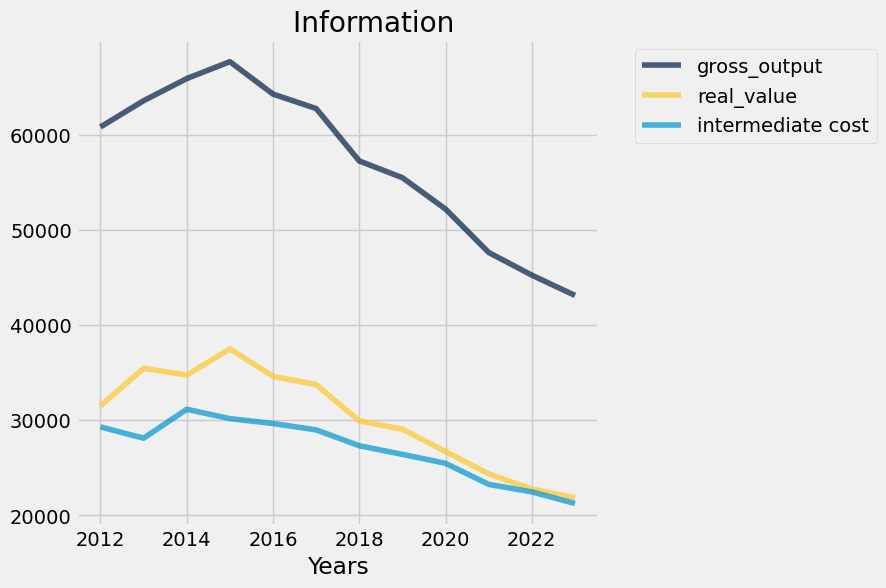

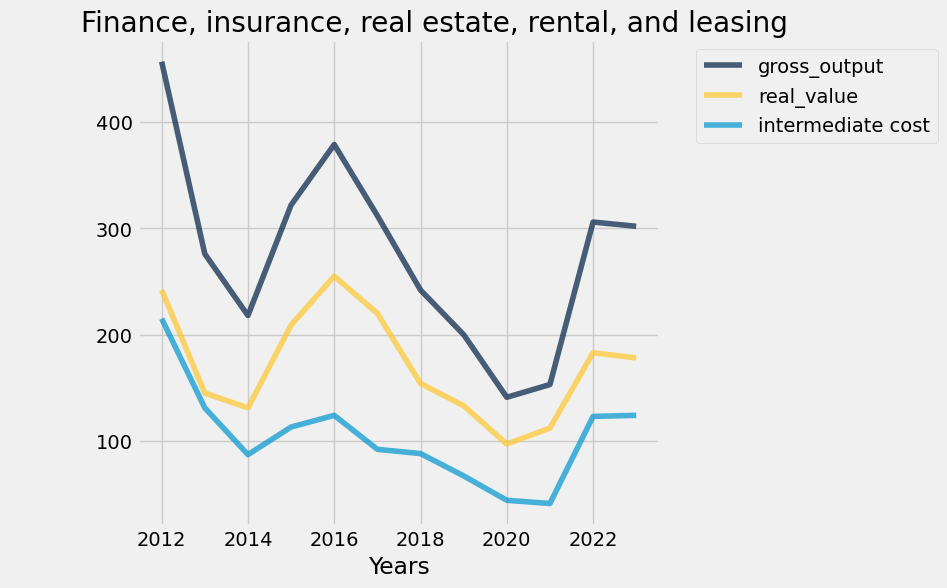

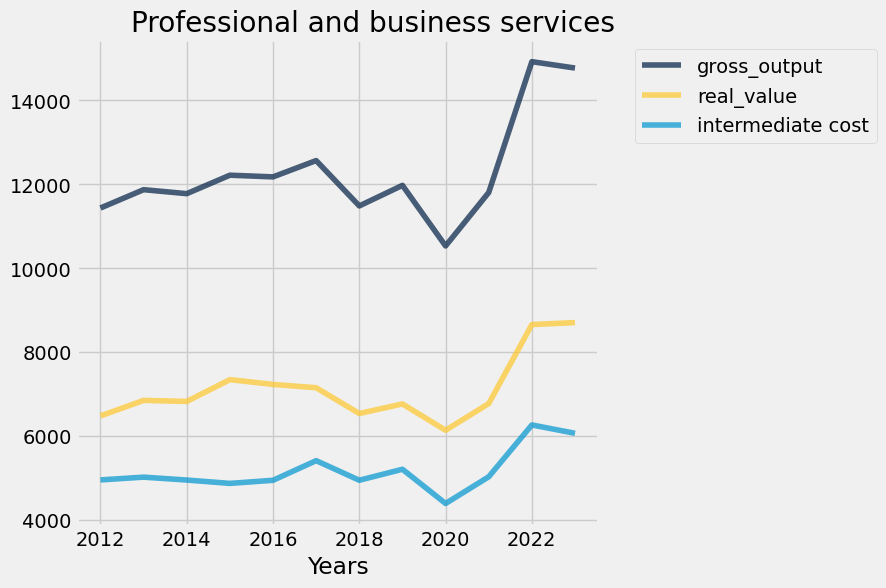

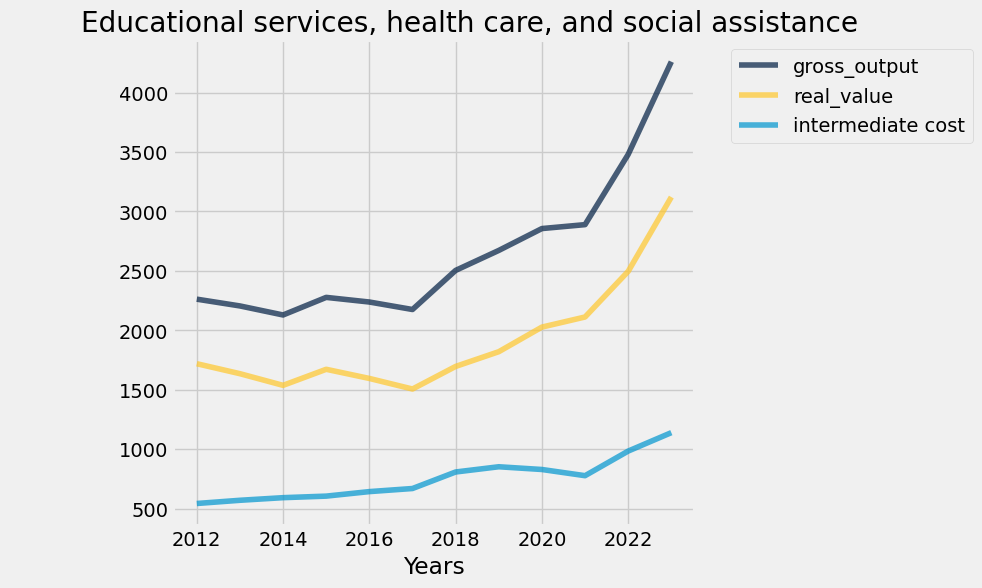

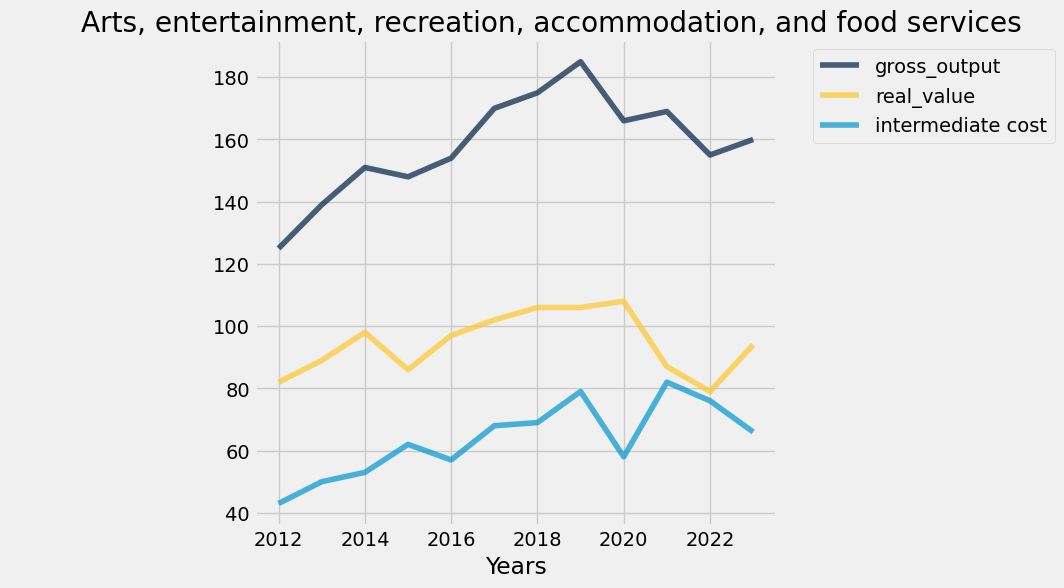

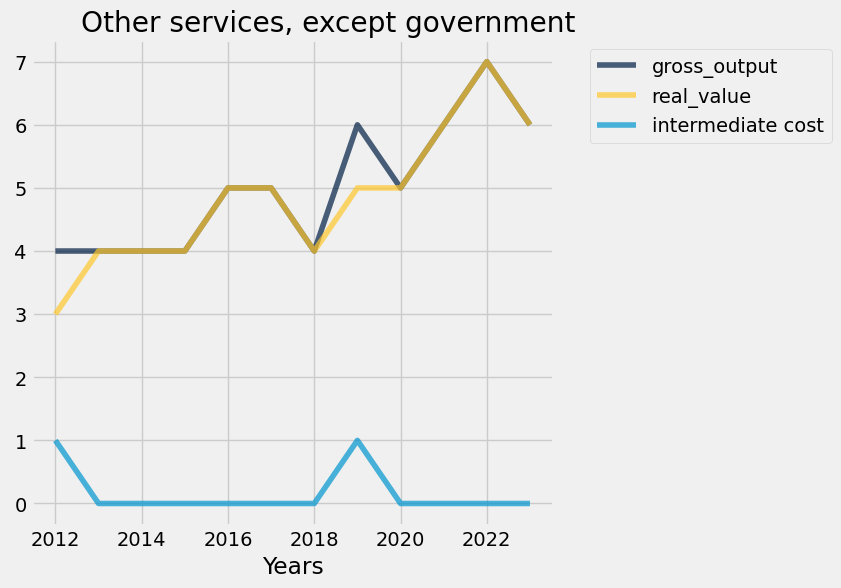

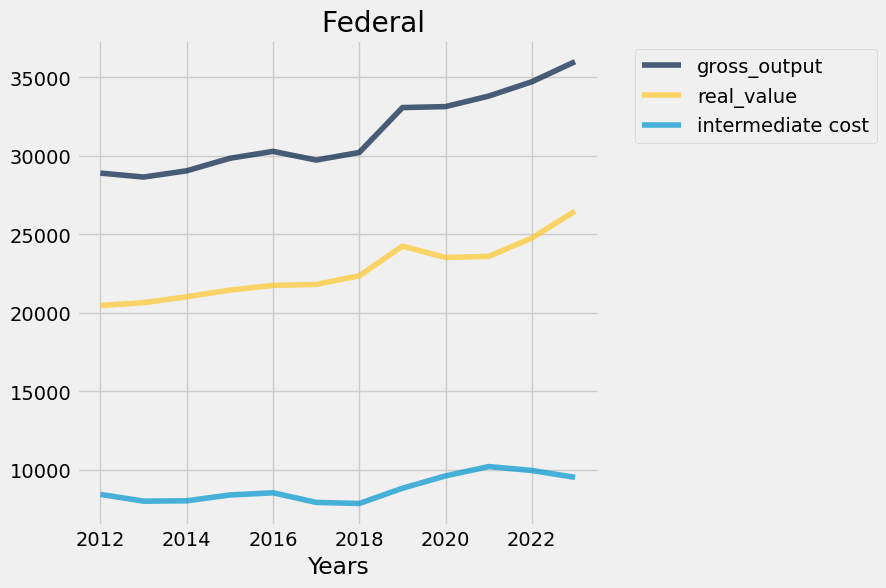

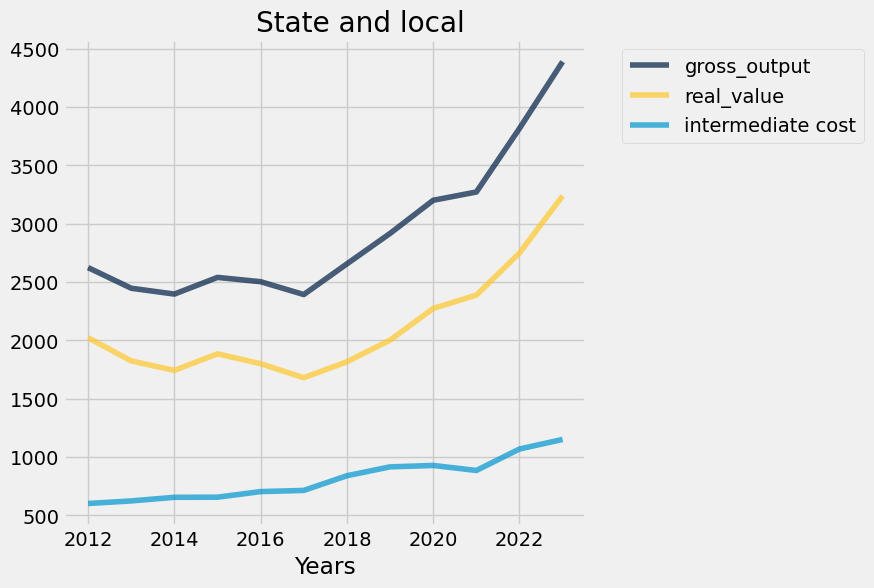

In [5]:
for i in np.arange(0,15):
    plt = plot(i)
    plt
    plots.title(real_value.column(0).item(i))

In [6]:
def show_table(row):
    array = real_value.row(row)
    anotherarray = gross_output.row(row)
    b = Table().with_column('industry',array).take(np.arange(1,13)).with_column('Years',np.arange(2012,2024))
    new_array = make_array()
    for i in np.arange(0,12):
        new = b.column('industry').item(i).split(",")
        newnew = int("".join(new))
        new_array = np.append(new_array,newnew)
    b = b.with_column('added_value',new_array).drop(0)

    c = Table().with_column('industry',anotherarray).take(np.arange(1,13)).with_column('Years',np.arange(2012,2024))
    anothernew_array = make_array()
    for i in np.arange(0,12):
        anothernew = c.column('industry').item(i).split(",")
        anothernewnew = "".join(anothernew)
        anothernewnew = int(anothernewnew)
        anothernew_array = np.append(anothernew_array,anothernewnew)
    c = c.with_column('gross_output',anothernew_array).drop(0)
    complete = c.join('Years',b,'Years')
    complete = complete.with_column('intermediate cost',complete.column('gross_output')-complete.column('added_value'))
    return complete

In [7]:
def newplot(row,rgb1,rgb2,rgb3,rgb4,rgb5,rgb6):
    tbl = show_table(row)
    df = tbl.to_df()
    color1 = (rgb1/255,rgb2/255,rgb3/255)
    color2 = (rgb4/255,rgb5/255,rgb6/255)
    ax = df.plot(x="Years", y=["gross_output", "added_value","intermediate cost"], color=[color1,color2,"black"])
    return ax

<Axes: xlabel='Years'>

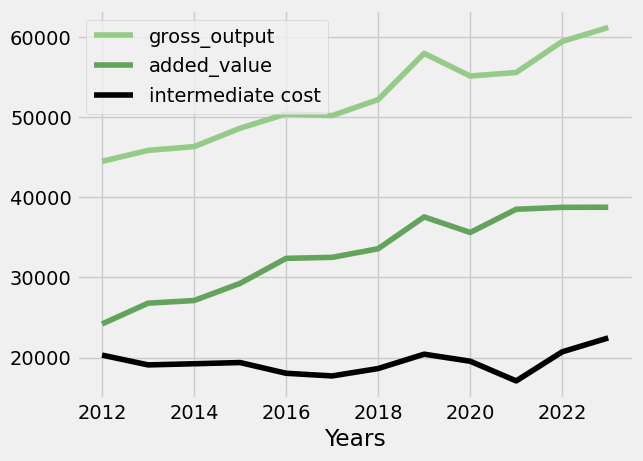

In [8]:
newplot(3,148,203,136,100,163,91)